In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

We compute the $p$-value associated with the Wald test
for a `Binomial(n, theta)` where `n` is known and
`theta` is being tested for.

In [16]:
def binomial_wald_test(theta_0, n, X):
    
    # Estimate theta
    theta_est = X/n

    # Estimate the standard error
    se_est = np.sqrt(
        theta_est*(1-theta_est)/n
    )

    # Construct the Wald test statistic
    W_n = (theta_est - theta_0)/se_est

    # Compute the p-value
    pval = 2*(1-scipy.stats.norm.cdf(abs(W_n)))
    
    # Compute the confidence interval
    z = scipy.stats.norm.isf(0.025)
    confidence_interval = (
        theta_est - se_est*z,
        theta_est + se_est*z
    )
    
    return theta_est, se_est, W_n, pval, confidence_interval

In [20]:
# The p-value for the dataset of interest.
theta_est, se_est, W_n, pval, confidence_interval = binomial_wald_test(theta_0=0.5, n=1919, X=922)
lower_bound, upper_bound = confidence_interval
print(
    f"Estimate of theta: {theta_est:.2f}.\n"
    f"Estimate of the standard error: {se_est:.4f}.\n"
    f"Value of |W_n|: {abs(W_n):.2f}.\n"
    f"p-value: {pval:.3f}.\n"
    f"The 95% confidence interval runs from {lower_bound:.3f} to {upper_bound:.3f}."
)

Estimate of theta: 0.48.
Estimate of the standard error: 0.0114.
Value of |W_n|: 1.71.
p-value: 0.087.
The 95% confidence interval runs from 0.458 to 0.503.


In [21]:
# Sanity check: when using n-X instead of X we get them same $p$-value.
binomial_wald_test(theta_0=0.5, n=1919, X=1919-922)

(0.5195414278269932,
 np.float64(0.011405138868050746),
 np.float64(1.7133879782678196),
 np.float64(0.08664118646589136),
 (np.float64(0.4971877664069358), np.float64(0.5418950892470505)))

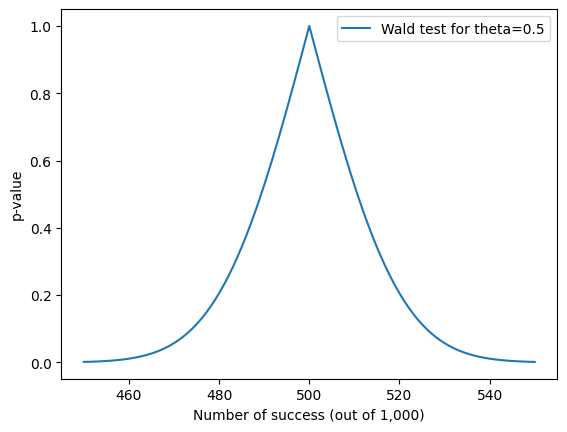

In [24]:
# Sanity checks:
# When X is close to n/2, we cannot reject the null hypothesis
# However when X is far from n/2, on either side, we can reject the null hypothesis

x = np.linspace(450, 550, 101)
y = [binomial_wald_test(theta_0=0.5, n=1000, X=xi)[3] for xi in x]

plt.plot(x, y)

plt.legend(['Wald test for theta=0.5'])
plt.xlabel('Number of success (out of 1,000)')
plt.ylabel('p-value')

plt.show()